In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In this experiment, 10 mice were injected with a virus expressing the inhibitory DREADD hM4Di under the mu opioid receptor (MORs) promotor. Another 10 were injected with a control construct design to express a fluorescent reporter, without an active DREADD. 

Because MORs are inhibitory, activating this receptor with its agonist CNO should cause the same effects as opioid activation. In this case, after systemic CNO administration, mice should exhbit hyperlocomotion.

There are two comparisons which could reveal a hyperlocomotive state:

1) Comparing distance traveled by DREADD mice with control mice who only express a fluorescent reporter (YFP) under the MOR promoter, and in which CNO should have no effect. The distance traveled by the 10 YFP mice would in this case constitute the null distribution. This is a between-subject, unpaired comparison.

2) Comparing distance traveled within DREADD mice when administered saline and CNO on separate days. In this case, the distance each mouse traveled after saline injection would comprise the null distribution. This is a paired, within subjects comparison.

There is one comparison that could rule out a psychoactive effect of clozapine, a metabolite of the agonist CNO:

1) Comparaing distance traveled in YFP mice between CNO and saline days. In this case, distance traveled by saline-injected YFP mice would constitute the null distribution. This is a paired, within subjects comparison.

Finally, there is one comparison that could rule out an effect due simply to DREADD expression (perhaps impacting cellular viability):

1) Comparing distance traveled between DREADD and YFP mice after saline injection. The null distribution in this case would be distance traveled by YFP mice. This is a between-subject, unpaired comparison.

In the first sections below, we visualize the raw data as provided from the Ethovision software, which gives us the distance traveled in 5 minute time bins for 30 before the injection and an hour after the incubation period for CNO. For each group on each treatment day, we first create heatmaps to visualize the intensity of locomotion for each mouse in each time bin. If mice exhibit hyperlocomotion, the first 5 time bins pre-injection should be darker (e.g. less distance traveled) than the following 10. If mice exhibit hypolocomotion, the first five time bins should be brighter than the following 10.

Text(33.0, 0.5, 'Time bin (5 min increments)')

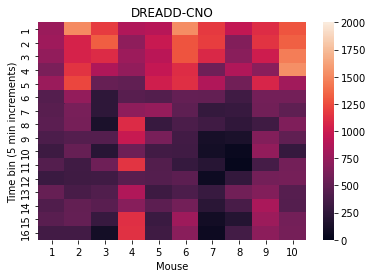

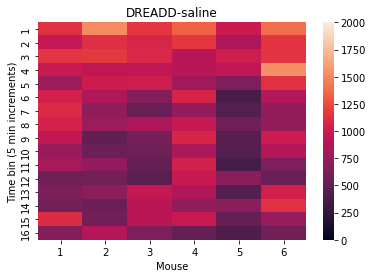

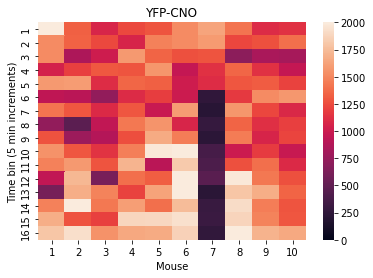

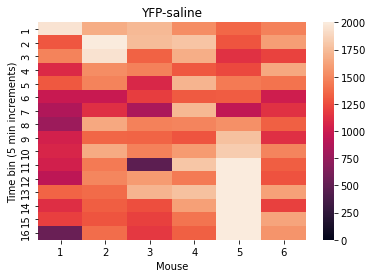

In [3]:
#visualize the raw data

#sizes of treatment groups
n1 = 10
n2 = 6

#raw data copied from spreadsheet
DREADDCNO = np.array([[767.527,	1509.7,	1184.17,	867.53,	901.324,	1526.09,	1176.94,	958.943,	1110,	1282.21],
[788.103,	1057.12,	1321.67,	715.742,	985.082,	1286.71,	1188.08,	660.174,	1141.88,	1334.9],
[728.491,	1056.58,	1107.91,	779.851,	915.017,	1282.16,	1090.12,	691.157,	1009.41,	1455.91],
[621.394,	1142.13,	863.264,	733.636,	968.307,	1115.41,	569.646,	867.657,	691.739,	1531.78],
[768.581,	1229.65,	527.641,	501.877,	1030.39,	1130.2,	872.408,	581.445,	1073.68,	799.071],
[444.609,	734.428,	245.242,	460.477,	432.671,	520.946,	513.93,	340.569,	586.066,	591.137],
[456.544,	617.111,	246.235,	718.498,	744.669,	484.893,	279.383,	296.669,	579.853,	489.243],
[469.017,	607.664,	141.079,	1108.49,	292.318,	394.752,	337.061,	250.935,	329.027,	640.864],
[400.261,	439.136,	439.857,	979.96,	609.395,	350.068,	119.218,	142.199,	661.907,	495.296],
[325.655,	529.155,	212.359,	557.959,	351.19,	342.727,	105.162,	48.8683,	729.344,	288.963],
[440.221,	338.615,	562.733,	1150.88,	436.236,	281.306,	207.294,	28.6017,	363.646,	593.354],
[311.479,	328.702,	338.568,	460.825,	441.357,	479.351,	76.0095,	268.053,	591.93,	594.066],
[528.317,	380.4,	424.689,	867.43,	326.026,	399.215,	300.124,	581.256,	658.628,	451.447],
[416.596,	510.584,	467.754,	682.989,	479.818,	586.711,	220.634,	381.562,	840.842,	439.755],
[463.761,	518.072,	291.079,	1132.36,	306.846,	786.962,	94.5277,	189.563,	775.436,	589.83],
[348.137,	344.369,	105.807,	1136.7,	334.238,	694.309,	64.8165,	355.819,	704.235,	597.391]])


YFPCNO = np.array([[2009.95,	1332.46,	1070.46,	1242.14,	1284.21,	1516.42,	1639.36,	1415.94,	1105.48,	1138.57],
[1522.51,	1339.38,	1241.17,	1062.63,	1475.49,	1517.23,	1586.12,	1227.66,	1269.63,	1396.56],
[1515.9,	852.626,	1014.57,	1584.36,	1348.49,	1273.11,	1281.56,	706.97,	838.789,	822.064],
[1047.94,	1199.94,	1301.94,	1288.03,	1568.23,	963.031,	1134.44,	1357.88,	1139.94,	964.33],
[1582.22,	1598.95,	1110.4,	1356.55,	1334.9,	1013.67,	1111.87,	1296.14,	1313.94,	1217.12],
[943.14,	916.294,	729.079,	1105.84,	1189.69,	1005.55,	257.788,	1178.58,	1518.64,	1574.02],
[1421.56,	1289.74,	1101.49,	1292.22,	988.507,	1600.03,	218.581,	1566.9,	1230.59,	1086.65],
[729.26,	473.017,	948.075,	1432.74,	1561.59,	1072.72,	288.322,	1348.74,	1129.35,	1198.7],
[1279.38,	780.71,	888.596,	1260.66,	1666.25,	1458.33,	232.468,	1452.74,	1063.43,	1220.93],
[1552.12,	1292.47,	1145.74,	1462.84,	1982.19,	2071.21,	372.955,	1005.27,	1182.17,	983.352],
[1475.87,	1581.89,	1285.92,	1715.36,	919.701,	1824.72,	399.276,	1267.34,	1397.95,	1096.97],
[951.78,	1731.62,	615.693,	1397.54,	1322.22,	1992.95,	463.547,	1982.8,	1434.31,	1265.85],
[609.365,	1680.65,	1482.57,	1215.02,	1629,	2418.18,	222.635,	1802.99,	1686.66,	1347.31],
[1471.87,	2063.72,	1437.43,	1604.56,	1392.4,	1755.73,	301.94,	1917.42,	1460.83,	1287.47],
[1687.19,	1274.64,	1209.63,	1888.37,	1895.83,	1943.11,	309.287,	1881.76,	1482,	1290.21],
[1801.89,	1935.16,	1552.4,	1652.51,	1670.04,	1862.5,	261.261,	2157.9,	1706.62,	1662.8]])

DREADDsaline= np.array([[1133.23,	1516.2,	1160.97,	1329.26,	998.002,	1387.45,],
[966.653,	1125.43,	1076.83,	1161.14,	858.628,	1148.48],
[1152.43,	1166.78, 1083.04,	906.511,	1022.94,	1155.27],
[991.293,	939.204,	947.452,	906.737,	950.878,	1531.62],
[775.046,	1000.26,	1010.11,	788.531,	634.869,	1138.04],
[1051.2,	867.236,	660.644,	1063.11,	386.233,	877.996],
[1098.97,	722.003,	539.331,	746.149,	441.322,	736.549],
[1051.09,	778.63,	856.104,	983.23,	561.377,	737.966],
[956.91,	500.754,	615.194,	1066.09,	467.131,	1004.22],
[767.914,	554.396,	555.91,	844.174,	439.968,	884.92],
[820.889,	726.614,	530.324,	1042.86,	374.925,	640.305],
[583.433,	590.114,	479.464,	977.678,	708.091,	533.17],
[640.409,	696.884,	963.937,	868.929,	447.89,	1034.9],
[598.456,	547.718,	916.23,	738.633,	690.901,	1134.21],
[1107.16,	572.195,	921.86,	987.416,	530.979,	761.534],
[669.517,	885.659,	638.856,	521.718,	409.983,	582.65]])

YFPsaline = np.array([[1960.38,	1678.52,	1735.18,	1527.7,	1364.02,	1470.34],
[1291.8,	2198.84,	1755.32,	1792.04,	1286.43,	1604.39],
[1482.05,	1950.16,	1341.78,	1687.37,	1140.12,	1213.1],
[1097.79,	1526.04,	1472.14,	1302.43,	1234.94,	1652.45],
[1299.19,	1482.62,	1082.19,	1718.17,	1442.57,	1407.44],
[989.61,	985.039,	1192.24,	1312.08,	1314.97,	1022.03],
[868.106,	1126.98,	849.682,	1731.09,	952.843,	1134.72],
[777.246,	1648.8,	1470.7,	1484.57,	1544.29,	1335.48],
[1039.84,	1353.65,	1344.06,	1285.42,	1780.77,	1132.69],
[1078.11,	1665.27,	1474.95,	1586.3,	1829.87,	1488.46],
[1037.3, 1445.07,	482.804,	1799.38,	2299.89,	1322.31],
[931.492,	1499.45,	1590.71,	1439.05,	2755.05,	1276.02],
[1345.54,	1375.3,	1714.05,	1776.28,	2615.21,	1622.42],
[1124.68,	1328.03,	1260.07,	1612.91,	2557.12,	1210.8],
[1199.72,	1287.75,	1206.62,	1421.18,	2499.1,	1640.36],
[542.118,	1385.12,	1168.2,	1333.29,	2932.84,	1562.43]])


#calculate and store means and SEMs for each group
DREADDc_means = np.mean(DREADDCNO, axis=1)
DREADDc_sems = np.std(DREADDCNO, axis=1)/n1
YFPc_means = np.mean(YFPCNO, axis=1)
YFPc_sems = np.std(YFPCNO, axis=1)/n1
DREADDs_means = np.mean(DREADDsaline, axis=1)
DREADDs_sems = np.std(DREADDsaline, axis=1)/n2
YFPs_means = np.mean(YFPsaline, axis=1)
YFPs_sems = np.std(YFPsaline, axis=1)/n2


#create heatmaps displaying the raw data in original form: each mouse's distance traveled in 5 min time bins
#DREADD-CNO
fig, ax = plt.subplots()
ax = sns.heatmap(DREADDCNO, vmin = 0, vmax = 2000, xticklabels = np.arange(1,11), yticklabels = np.arange(1,17))
plt.title('DREADD-CNO')
plt.xlabel('Mouse')
plt.ylabel('Time bin (5 min increments)')

#DREADD-saline
fig, ax = plt.subplots()
ax = sns.heatmap(DREADDsaline, vmin = 0, vmax = 2000, xticklabels = np.arange(1,7), yticklabels = np.arange(1,17))
plt.title('DREADD-saline')
plt.xlabel('Mouse')
plt.ylabel('Time bin (5 min increments)')

#YFP-CNO
fig, ax = plt.subplots()
ax = sns.heatmap(YFPCNO, vmin = 0, vmax = 2000, xticklabels = np.arange(1,11), yticklabels = np.arange(1,17))
plt.title('YFP-CNO')
plt.xlabel('Mouse')
plt.ylabel('Time bin (5 min increments)')

#YFP-saline
fig, ax = plt.subplots()
ax4 = sns.heatmap(YFPsaline, vmin = 0, vmax = 2000, xticklabels = np.arange(1,7), yticklabels = np.arange(1,17))
plt.title('YFP-saline')
plt.xlabel('Mouse')
plt.ylabel('Time bin (5 min increments)')


As we can see, to our surprise, it seems that CNO induced the opposite effect in individual DREADD mice than we might expect (they cover less distance after injection, and seem overall to move less than the other mice/conditions). Furthermore, you can see the YFP groups contain mice with very distinct patterns of locomotion.

Below, to get an idea of how the distribution of distances traveled in each group changes over time relative to one another, we create histograms of distance traveled by indiviudal mice in 5 key timebins throughout the experiment. The first and fifth time bins are prior to the injection; the sixth is the first time bin counted afterwards, the eleventh is the middle of the post-injection period, and the 16th is the last time bin measured. Ideally, the distributions would display large overlap/appear indistinguishable prior to drug delivery, and separate out afterwards.

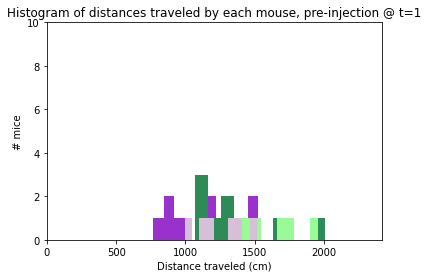

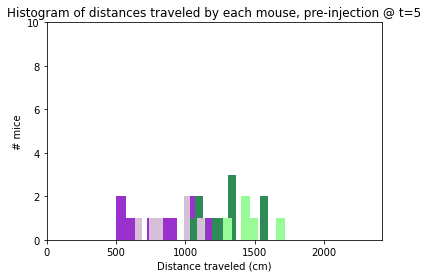

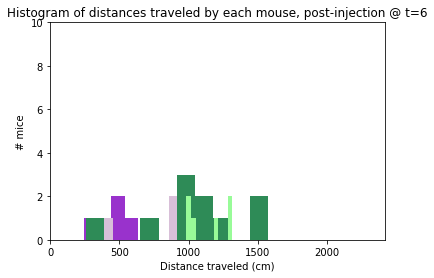

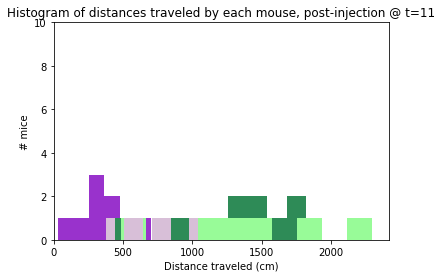

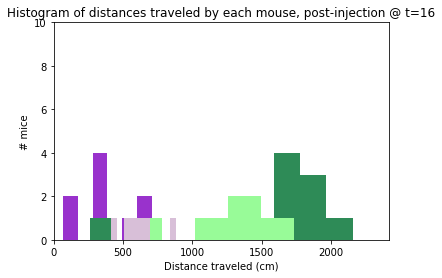

In [9]:
#plot histograms of distance traveled for pre-injection time bins t=1 & t=5 and post-injection time bins t=6, t=11, & t=16 to assess how distributions of distance traveled in each group vary with time
#hist @ t=0
_ = plt.hist(DREADDCNO[0,:],color='darkorchid')                                  #plot histograms of each group overlaid
plt.hist(YFPCNO[0,:],color='seagreen')
plt.hist(YFPsaline[0,:],color = 'palegreen')
plt.hist(DREADDsaline[0,:],color='thistle')
plt.title("Histogram of distances traveled by each mouse, pre-injection @ t=1")
plt.axis([0, np.amax(YFPCNO), 0, 10])                                    #design axis (xo, xmax, yo, ymax)
plt.xlabel('Distance traveled (cm)')
plt.ylabel('# mice')
plt.show()

#hist @ t=5
_ = plt.hist(DREADDCNO[4,:],color='darkorchid')                                  #plot histograms of each group overlaid
plt.hist(YFPCNO[4,:],color='seagreen')
plt.hist(YFPsaline[4,:],color = 'palegreen')
plt.hist(DREADDsaline[4,:],color='thistle')
plt.title("Histogram of distances traveled by each mouse, pre-injection @ t=5")
plt.axis([0, np.amax(YFPCNO), 0, 10])                                    #design axis (xo, xmax, yo, ymax)
plt.xlabel('Distance traveled (cm)')
plt.ylabel('# mice')
plt.show()

#hist @ t=6
_ = plt.hist(DREADDCNO[5,:],color='darkorchid')                                  #plot histograms of each group overlaid
plt.hist(DREADDsaline[5,:],color='thistle')
plt.hist(YFPCNO[5,:],color='seagreen')
plt.hist(YFPsaline[5,:],color = 'palegreen')
plt.title("Histogram of distances traveled by each mouse, post-injection @ t=6")
plt.axis([0, np.amax(YFPCNO), 0, 10])                                    #design axis (xo, xmax, yo, ymax)
plt.xlabel('Distance traveled (cm)')
plt.ylabel('# mice')
plt.show()

#hist @ t=11
_ = plt.hist(DREADDCNO[10,:],color='darkorchid')                                  #plot histograms of each group overlaid
plt.hist(YFPCNO[10,:],color='seagreen')
plt.hist(YFPsaline[10,:],color = 'palegreen')
plt.hist(DREADDsaline[10,:],color='thistle')
plt.title("Histogram of distances traveled by each mouse, post-injection @ t=11")
plt.axis([0, np.amax(YFPCNO), 0, 10])                                    #design axis (xo, xmax, yo, ymax)
plt.xlabel('Distance traveled (cm)')
plt.ylabel('# mice')
plt.show()

#hist @ t=16
_ = plt.hist(DREADDCNO[15,:],color='darkorchid')                                  #plot histograms of each group overlaid
plt.hist(YFPCNO[15,:],color='seagreen')
plt.hist(YFPsaline[15,:],color = 'palegreen')
plt.hist(DREADDsaline[15,:],color='thistle')
plt.title("Histogram of distances traveled by each mouse, post-injection @ t=16")
plt.axis([0, np.amax(YFPCNO), 0, 10])                                    #design axis (xo, xmax, yo, ymax)
plt.xlabel('Distance traveled (cm)')
plt.ylabel('# mice')
plt.show()

From these plots, we can see that the distributions differentiate over time post-drug delivery as we would hope. However, we also see that the DREADD mice (red) tend to move around less in general than the YFP mice (yellow/green). Nevertheless, the saline and CNO distributions in the DREADD mice do appear to separate out too, suggesting that activation of the DREADD receptor by CNO does indeed have some unique effect.

Finally, we want to visualize how far each group traveled on average overtime. Now, we can produce the standard line plot of average distance over time with SEM bars as a measure of variance.

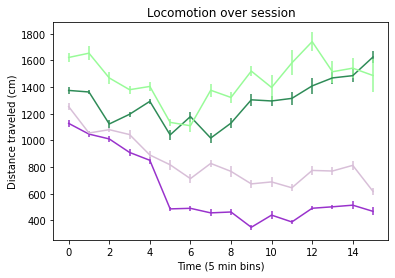

In [12]:
#create line plots of average and SEM distance traveled over time to gauge group travel
x = np.arange(16)
fig, ax = plt.subplots()
ax.errorbar(x,DREADDc_means,
            yerr=DREADDc_sems, color = 'darkorchid',ecolor='darkorchid')
ax.errorbar(x,YFPc_means,
            yerr=YFPc_sems, color = 'seagreen',ecolor='seagreen')
ax.errorbar(x,DREADDs_means,
            yerr=DREADDs_sems, color = 'thistle',ecolor='thistle')
ax.errorbar(x,YFPs_means,
            yerr=YFPs_sems, color = 'palegreen',ecolor='palegreen')
ax.set_xlabel('Time (5 min bins)')
ax.set_ylabel('Distance traveled (cm)')
ax.set_title('Locomotion over session')

plt.show()

Here, you can see the trends we were able to gather from looking at the raw data displayed very clearly - DREADD mice move less than YFP mice in general, but CNO (to our surprise) further supresses locomotion. Let's confirm these suspicions by looking at total distance traveled post injection between each group and each treatment.

We will sum up the total distance traveled in each post-injection time bin to get total distance traveled by each mouse and compare them in boxplots first. This way we will get a sense of the central tendency and spread of the data in each group, and whether their standard deviations overlap.

Next we will look at histograms to assess the normality of these distributions. As a sanity check I will also simulate normal distributions based on the mean and standard deviations of the observed data. This will help me later when determining whether to choose a parametric or nonparametric test.

Finally, I will compute 95% confidence intervals as a stricter standard to compare whether my distributions overlap. If any confidence intervals overlap, that means that the observed mus could theoretically derive from either of the overlapping distributions and thus cannot be regarded as different. However, if they do not overlap at all, this is a very strong indicator that the observed mus could not have arisen from the same population/condition.

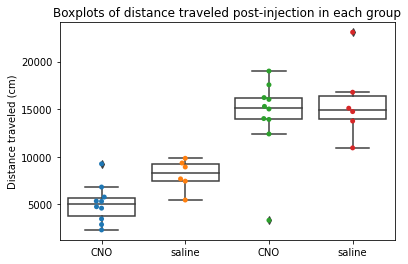

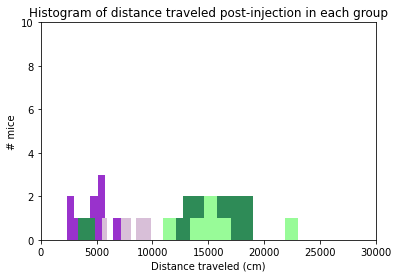

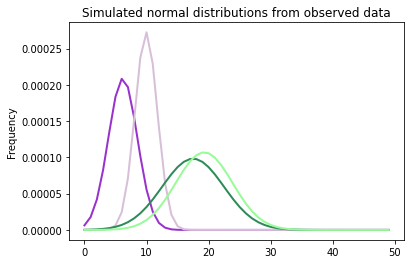

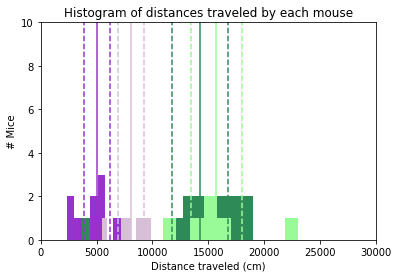

In [11]:
#total distance traveled by each mouse post injection
DREADDc = np.sum(DREADDCNO[5:,:], axis=0)
DREADDs = np.sum(DREADDsaline[5:,:], axis=0)
YFPc = np.sum(YFPCNO[5:,:], axis=0)
YFPs = np.sum(YFPsaline[5:,:], axis=0)

#calculate and store means
mus = np.zeros(4)
mus[0] = np.mean(DREADDc)
mus[1] = np.mean(DREADDs)
mus[2] = np.mean(YFPc)
mus[3] = np.mean(YFPs)

#calculate and store stds aka sigmas
sigs = np.zeros(4)
sigs[0] = np.std(DREADDc)
sigs[1] = np.std(DREADDs)
sigs[2] = np.std(YFPc)
sigs[3] = np.std(YFPs)

treatment = ['CNO','saline','CNO','saline']
#PLOT 1: assess parameters of distributions
#boxplots
ax = sns.swarmplot(data=[DREADDc,DREADDs, YFPc, YFPs])                                   #plot scattered points in each group
ax = sns.boxplot(data=[DREADDc,DREADDs,YFPc,YFPs],boxprops={'facecolor':'None'})
plt.xticks([0, 1,2,3], treatment)                                               #xtick location and label 
plt.ylabel('Distance traveled (cm)')
plt.title('Boxplots of distance traveled post-injection in each group')
plt.show()

#PLOT 2: assess normality of distributions
_ = plt.hist(DREADDc,color='darkorchid')                                  #plot histograms of each group overlaid
plt.hist(YFPc,color='seagreen')
plt.hist(YFPs,color = 'palegreen')
plt.hist(DREADDs,color='thistle')
plt.title("Histogram of distance traveled post-injection in each group")
plt.axis([0, 30000, 0, 10])                                    #design axis (xo, xmax, yo, ymax)
plt.xlabel('Distance traveled (cm)')
plt.ylabel('# mice')
plt.show()

#PLOT 3: simulate each group data with means and stds as if they were normally distributed to assess overlap
x = np.linspace(0,40000)
_=plt.plot(st.norm.pdf(x, mus[0], sigs[0]),linewidth=2, color='darkorchid')
plt.title("Simulated normal distributions from observed data")
plt.plot(st.norm.pdf(x, mus[1], sigs[1]),linewidth=2, color='thistle')
plt.plot(st.norm.pdf(x, mus[2], sigs[2]),linewidth=2, color='seagreen')
plt.plot(st.norm.pdf(x, mus[3], sigs[3]),linewidth=2, color='palegreen')
plt.ylabel('Frequency')
plt.show()

#compute SEM and 95% confidence intervals. create matrix with upper and lower bounds of intervals according to the formula: bound = mu +/- sig*1.96
SEMs = [sigs[0]/np.sqrt(n1),sigs[1]/np.sqrt(n2),sigs[2]/np.sqrt(n1),sigs[3]/np.sqrt(n1)]
conf95 = np.zeros((4,2))
conf95[0,0] = mus[0]+SEMs[0]*1.96 
conf95[0,1] = mus[0]-SEMs[0]*1.96 
conf95[1,0] = mus[1]+SEMs[1]*1.96 
conf95[1,1] = mus[1]-SEMs[1]*1.96 
conf95[2,0] = mus[2]+SEMs[2]*1.96 
conf95[2,1] = mus[2]-SEMs[2]*1.96 
conf95[3,0] = mus[3]+SEMs[3]*1.96 
conf95[3,1] = mus[3]-SEMs[3]*1.96 

#PLOT 4: distributions with 95% confidence intervals overlaid
_ = plt.hist(YFPc, color = 'seagreen')  # arguments are passed to np.histogram
plt.hist(DREADDc, color = 'darkorchid')
plt.hist(YFPs, color = 'palegreen')
plt.hist(DREADDs, color = 'thistle')
plt.title("Histogram of distances traveled by each mouse")
plt.axvline(x=conf95[0,0],color = 'darkorchid', linestyle = '--')
plt.axvline(x=conf95[0,1],color = 'darkorchid', linestyle = '--')
plt.axvline(x=conf95[1,0],color = 'thistle', linestyle = '--')
plt.axvline(x=conf95[1,1],color = 'thistle', linestyle = '--')
plt.axvline(x=conf95[2,0],color = 'seagreen', linestyle = '--')
plt.axvline(x=conf95[2,1],color = 'seagreen', linestyle = '--')
plt.axvline(x=conf95[3,0],color = 'palegreen', linestyle = '--')
plt.axvline(x=conf95[3,1],color = 'palegreen', linestyle = '--')
plt.axvline(x=mus[0],color = 'darkorchid')
plt.axvline(x=mus[1],color = 'thistle')
plt.axvline(x=mus[2],color = 'seagreen')
plt.axvline(x=mus[3],color = 'palegreen')
plt.axis([0, 30000, 0, 10])
plt.xlabel('Distance traveled (cm)')
plt.ylabel('# Mice')
plt.show()

From these visualizations we can see that overall, the DREADD mice moved around certainly less than the YFP mice, but also that CNO administration resulted in a reduction in locomotion, and no discernable effect on YFP locomotion. If the future statistical tests confirm this, this will show that transfection of our virus affected cell function, but that CNO activation of our DREADD did successfully alter behavior, although not due to conversion to clozapine.

Intriguingly, with the exception of one outlier, while YFP mice displayed more normally distributed bouts of locomotion, DREADD mice seem to display more uniform or skewed distributions. Due to the low N it's difficult to say whether this results from a sharpening of their distribution converging around a central limit, but that is one possibility. Nevertheless, I will move forward with non-parametric tests to be as parsimonious as possible. 

Finally, I will display these data as traditional bar graphs overlaid with SEM bars and swarmplots for ease of interpretation.

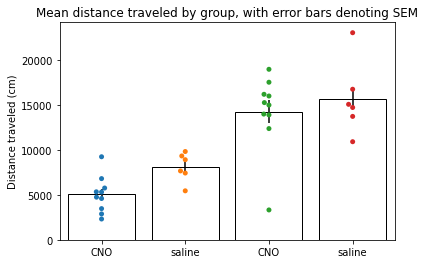

array([4604.597 , 5348.236 , 3475.402 , 9256.568 , 4754.764 , 5321.24  ,
       2318.1597, 2884.095 , 6820.914 , 5771.346 ])

In [ ]:
#PLOT 5: bar plots comparing mean of each group
_=plt.bar([0,1,2,3], [mus[0],mus[1],mus[2],mus[3]],yerr=SEMs,color = 'w',edgecolor = 'k')       #(bar locations, bar heights (means), error bar lengths, color)
ax = sns.swarmplot(data=[DREADDc,DREADDs,YFPc,YFPs])                             #plot raw data on top of bar
plt.title("Mean distance traveled by group, with error bars denoting SEM")
plt.ylabel('Distance traveled (cm)')
plt.xticks([0, 1, 2, 3], treatment)
plt.show()
DREADDc